In [13]:
import pandas as pd
import numpy as np

import itertools

from sklearn.feature_selection import SelectKBest, f_classif

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re

In [14]:
# scipy.__version__

'1.7.1'

In [3]:
df = pd.read_csv('./data/train_df_step1.csv', index_col='Id')
t_df= pd.read_csv('./data/test_df_step1.csv', index_col='Id')
df

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch_cat,ScreenPorch_cat,MiscVal_cat,PoolArea_cat,1stFlrSF_log,AverageRoomSF_log,GrLivArea_log,LotArea_log,SalePrice_log,totSqFt_log
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,3.0,Lvl,Inside,0.0,CollgCr,Norm,Norm,...,0,0,0,0,6.752270,5.364807,7.444249,9.041922,12.247694,8.360773
2,20,RL,Pave,3.0,Lvl,FR2,0.0,Veenker,Feedr,Norm,...,0,0,0,0,7.140453,5.348694,7.140453,9.169518,12.109011,8.239065
3,60,RL,Pave,2.0,Lvl,Inside,0.0,CollgCr,Norm,Norm,...,0,0,0,0,6.824374,5.695974,7.487734,9.328123,12.317167,8.410053
4,70,RL,Pave,2.0,Lvl,Corner,0.0,Crawfor,Norm,Norm,...,0,0,0,0,6.867974,5.502424,7.448334,9.164296,11.849398,8.340456
5,60,RL,Pave,2.0,Lvl,FR2,0.0,NoRidge,Norm,Norm,...,0,0,0,0,7.043160,5.498079,7.695303,9.565214,12.429216,8.619930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,Pave,3.0,Lvl,Inside,0.0,Somerst,Norm,Norm,...,0,0,0,0,7.107425,5.315666,7.107425,8.922658,12.128111,8.206038
1456,60,RL,Pave,3.0,Lvl,Inside,0.0,Gilbert,Norm,Norm,...,0,0,0,0,6.859615,5.460801,7.406711,8.976768,12.072541,8.353968
1457,20,RL,Pave,3.0,Lvl,Inside,0.0,NWAmes,Norm,Norm,...,0,0,0,0,7.636752,5.690842,7.636752,9.486076,12.254863,8.646114


In [4]:
df.loc[:, df.apply(lambda x: len(x.unique()) == 2)].columns

Index(['Street', 'CentralAir', 'RenovatedY/N', '2ndFloorY/N', 'PorchY/N',
       'BsmtFinSF2_cat', 'LowQualFinSF_cat', 'EnclosedPorch_cat',
       '3SsnPorch_cat', 'ScreenPorch_cat', 'MiscVal_cat', 'PoolArea_cat'],
      dtype='object')

In [5]:
binomial = ['Street', 'CentralAir', 'RenovatedY/N', '2ndFloorY/N', 'PorchY/N',
       'BsmtFinSF2_cat', 'LowQualFinSF_cat', 'EnclosedPorch_cat',
       '3SsnPorch_cat', 'ScreenPorch_cat', 'MiscVal_cat', 'PoolArea_cat']

nominal = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'SaleType', 'SaleCondition']

ordinal = ['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'YrSold', 'AgeWhenSold', 'totBath', 'OtherRooms']

continuous = ['2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea',
       'GarageSpaceForCar', 'MasVnrArea', 'MoSold_cos', 'MoSold_sin',
       'OpenPorchSF', 'TotalBsmtFinSF', 'TotalBsmtSF', 'TotalPorchSF',
       'WoodDeckOpenPorch', 'WoodDeckSF', '1stFlrSF_log',
       'AverageRoomSF_log', 'GrLivArea_log', 'LotArea_log',
       'SalePrice_log', 'totSqFt_log']

In [6]:
set(df.columns) == set(binomial + nominal + ordinal + continuous)

True

## Standartize - ?

## 7 Relationships between variables

### 7.1 Analysis of Variation (ANOVA)

In [72]:
### ordinal and nominal data VS continious

## 1

def anova(frame, features, test='ftest'):
    anv = pd.DataFrame()
    anv['feature'] = features
    pvals = []
    for c in (features):
#         print(c)
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice_log'].values
            samples.append(s)
            print(cls, len(s))
#             print(s)
        print('-'*30)

    
#         The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
#         - The samples are independent.
#         - Each sample is from a normally distributed population.
#         - The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
        
        if test=='ftest':
            pval = stats.f_oneway(*samples)[1] 
        
        
#         Due to the assumption that H has a chi square distribution, 
#         the number of samples in each group must not be too small. 
#         A typical rule is that each sample must have at least 5 measurements.
        
        elif test=='kruskal':
            pval = stats.kruskal(*samples)[1] 

#         alex_govern = str(stats.alexandergovern(*samples))
#         pval = float(re.findall(r"[-+]?\d*\.\d+|\d+", alex_govern)[1])
        
        print('P value = ', pval)
        
        print('='*30)
        
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')


In [73]:
aftest = anova(df, nominal+ ordinal)
aftest['disparity'] = np.log(1./(aftest['pval'].values))

aftest.head(7)

RL 1018
RM 168
FV 44
C (all) 6
RH 16
------------------------------
P value =  4.6514018447495716e-42
Lvl 1130
Bnk 57
HLS 43
Low 22
------------------------------
P value =  1.0686079531280267e-06
Inside 907
FR2 39
Corner 225
CulDSac 77
FR3 4
------------------------------
P value =  0.0006765873344058962
CollgCr 146
Veenker 10
Crawfor 48
NoRidge 20
Mitchel 46
Somerst 63
OldTown 104
BrkSide 54
Sawyer 72
NridgHt 53
NAmes 208
SawyerW 55
IDOTRR 32
MeadowV 1
Edwards 93
Timber 28
Gilbert 76
ClearCr 17
NWAmes 63
NPkVill 4
StoneBr 21
Blmngtn 14
SWISU 24
------------------------------
P value =  8.944958445187363e-197
Norm 1074
Feedr 75
Artery 45
RRAe 11
RRNn 5
RRAn 22
PosA 5
PosN 13
RRNe 2
------------------------------
P value =  2.0396999582912972e-12
Norm 1241
Artery 2
RRNn 2
Feedr 5
RRAn 1
RRAe 1
------------------------------
P value =  0.012274859768841578
1Fam 1085
2fmCon 27
Duplex 50
TwnhsE 85
Twnhs 5
------------------------------
P value =  5.854528709388483e-11
2Story 337
1Story 65

1929.0 2
1933.0 1
------------------------------
P value =  3.7333674069955373e-73
2008 260
2007 282
2006 271
2009 282
2010 157
------------------------------
P value =  0.710579936479292
5 25
31 25
7 19
91 6
8 20
16 11
3 31
77 7
69 12
43 16
1 83
46 14
78 7
40 13
39 17
4 40
51 21
6 23
42 19
59 15
81 13
2 32
15 14
57 11
53 20
41 16
48 16
24 5
33 12
47 23
89 11
10 16
72 3
52 15
36 12
87 11
65 6
25 5
11 14
56 10
95 3
60 11
99 2
14 12
94 4
13 12
45 16
88 9
97 7
90 6
30 19
122 1
0 53
54 14
62 6
20 5
37 16
68 12
50 14
71 3
9 20
38 13
18 7
12 14
58 13
70 12
32 20
35 7
83 12
84 13
66 6
19 5
22 7
86 8
98 3
93 7
75 2
82 5
44 13
49 18
34 9
17 9
106 3
29 11
96 6
27 5
92 3
128 1
61 4
67 7
21 6
26 6
108 3
28 2
63 2
76 3
73 7
74 3
80 5
55 8
126 1
102 1
85 5
23 3
110 2
117 1
129 1
64 2
100 2
111 1
104 1
119 1
127 2
107 1
135 1
109 1
136 1
103 1
79 1
125 1
------------------------------
P value =  1.6458978654977951e-119
3.5 103
2.5 240
2.0 411
3.0 161
4.0 8
1.0 220
1.5 106
6.0 1
5.0 1
4.5 1
----------

,feature,pval,disparity
23,OverallQual,5.083514e-280,643.097823
3,Neighborhood,8.944958e-197,451.418173
52,totBath,2.507085e-169,388.217760
25,ExterQual,3.843302e-160,367.067283
43,GarageCars,3.068433e-157,360.384693
39,KitchenQual,3.523209e-156,357.943902
27,BsmtQual,5.891864e-136,311.378000


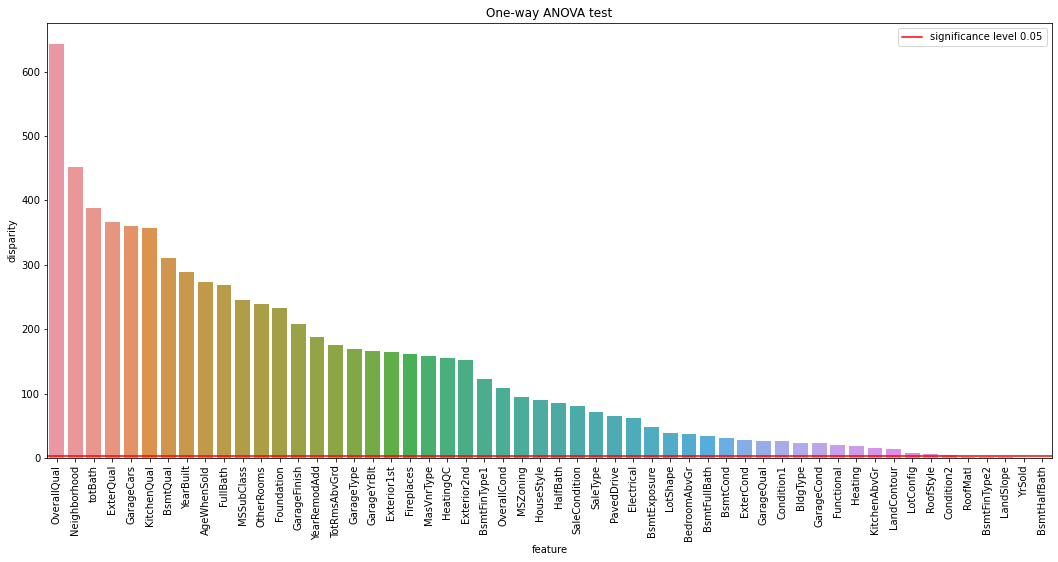

In [74]:
plt.figure(figsize=(18, 8))
sns.barplot(data=aftest[:], x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.title('One-way ANOVA test')
plt.axhline(y=np.log(1./0.05), color='r', label='significance level 0.05')
plt.legend()
plt.show()

In [75]:
akrusk = anova(df, nominal+ ordinal, 'kruskal')
akrusk['disparity'] = np.log(1./(akrusk['pval'].values))

akrusk.head(7)

RL 1018
RM 168
FV 44
C (all) 6
RH 16
------------------------------
P value =  2.615378074458025e-42
Lvl 1130
Bnk 57
HLS 43
Low 22
------------------------------
P value =  1.16087207598254e-05
Inside 907
FR2 39
Corner 225
CulDSac 77
FR3 4
------------------------------
P value =  0.00010179115648512732
CollgCr 146
Veenker 10
Crawfor 48
NoRidge 20
Mitchel 46
Somerst 63
OldTown 104
BrkSide 54
Sawyer 72
NridgHt 53
NAmes 208
SawyerW 55
IDOTRR 32
MeadowV 1
Edwards 93
Timber 28
Gilbert 76
ClearCr 17
NWAmes 63
NPkVill 4
StoneBr 21
Blmngtn 14
SWISU 24
------------------------------
P value =  1.3188285119381401e-138
Norm 1074
Feedr 75
Artery 45
RRAe 11
RRNn 5
RRAn 22
PosA 5
PosN 13
RRNe 2
------------------------------
P value =  3.907185951674875e-13
Norm 1241
Artery 2
RRNn 2
Feedr 5
RRAn 1
RRAe 1
------------------------------
P value =  0.013142302632046866
1Fam 1085
2fmCon 27
Duplex 50
TwnhsE 85
Twnhs 5
------------------------------
P value =  1.2875151121053902e-12
2Story 337
1Story 651

1973.0 5
1935.0 4
1990.0 14
1945.0 4
1987.0 11
1989.0 10
1915.0 1
1956.0 16
1948.0 11
1974.0 17
1950.0 27
1961.0 13
1921.0 3
1900.0 1
1999.0 20
1979.0 14
2009.0 14
1954.0 17
1969.0 17
1936.0 6
1975.0 7
1971.0 10
1960.0 16
1923.0 3
1984.0 8
1926.0 7
1955.0 13
1986.0 6
1957.0 20
1916.0 5
1932.0 4
1972.0 10
1980.0 13
1924.0 3
1988.0 13
1964.0 18
1996.0 15
1940.0 16
1949.0 10
1994.0 12
1910.0 3
1978.0 16
1981.0 7
1982.0 5
1951.0 5
1992.0 10
1925.0 9
1941.0 11
2010.0 3
1927.0 1
1918.0 1
1947.0 2
1937.0 2
1942.0 2
1938.0 3
1952.0 3
1928.0 4
1922.0 5
1934.0 2
1906.0 1
1946.0 5
1914.0 2
1929.0 2
1933.0 1
------------------------------
P value =  2.2063112380661873e-58
2008 260
2007 282
2006 271
2009 282
2010 157
------------------------------
P value =  0.9182341895649071
5 25
31 25
7 19
91 6
8 20
16 11
3 31
77 7
69 12
43 16
1 83
46 14
78 7
40 13
39 17
4 40
51 21
6 23
42 19
59 15
81 13
2 32
15 14
57 11
53 20
41 16
48 16
24 5
33 12
47 23
89 11
10 16
72 3
52 15
36 12
87 11
65 6
25 5
11 14
56 10


,feature,pval,disparity
23,OverallQual,1.163293e-170,391.288211
3,Neighborhood,1.318829e-138,317.479999
52,totBath,1.986371e-131,300.952338
25,ExterQual,1.363994e-123,282.907550
39,KitchenQual,6.569157e-120,274.427826
43,GarageCars,9.229276e-118,269.482660
27,BsmtQual,1.228282e-109,250.776158


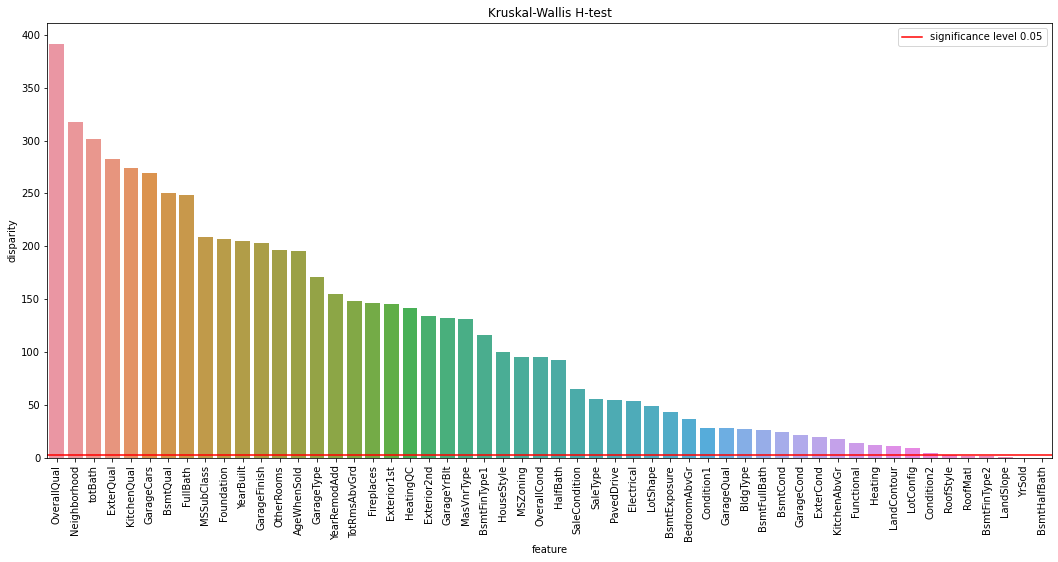

In [76]:
plt.figure(figsize=(18, 8))
sns.barplot(data=akrusk[:], x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.title('Kruskal-Wallis H-test')
plt.axhline(y=np.log(1./0.05), color='r', label='significance level 0.05')
plt.legend()
plt.show()

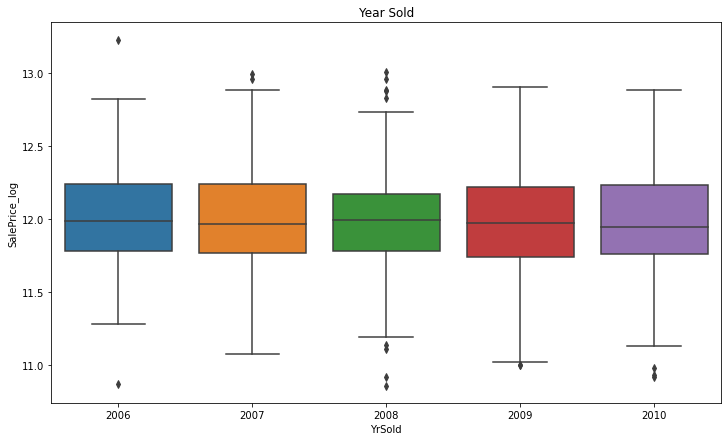

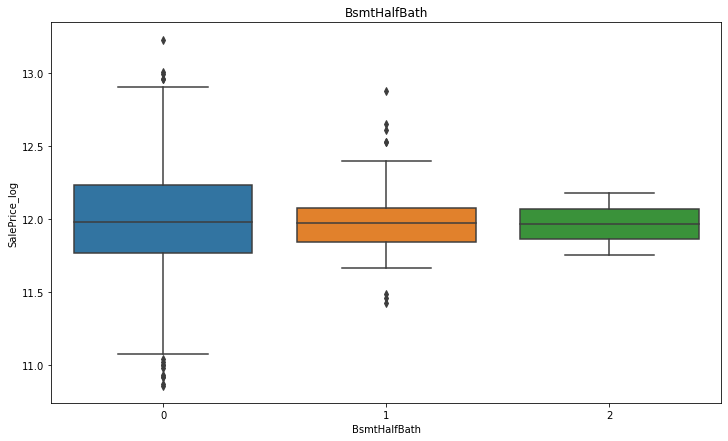

In [85]:
## Lowest P Value

plt.figure(1, figsize=(12,7))
sns.boxplot(data=df, x='YrSold', y='SalePrice_log')
plt.title('Year Sold')
plt.show(1)

plt.figure(2, figsize=(12,7))
sns.boxplot(data=df, x='BsmtHalfBath', y='SalePrice_log')
plt.title('BsmtHalfBath')
plt.show(2)

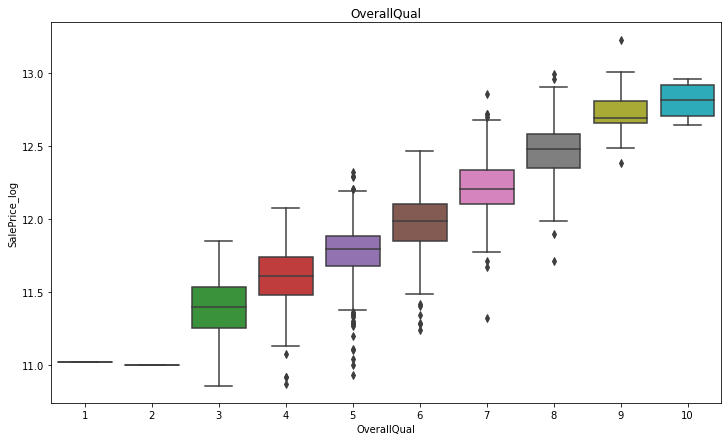

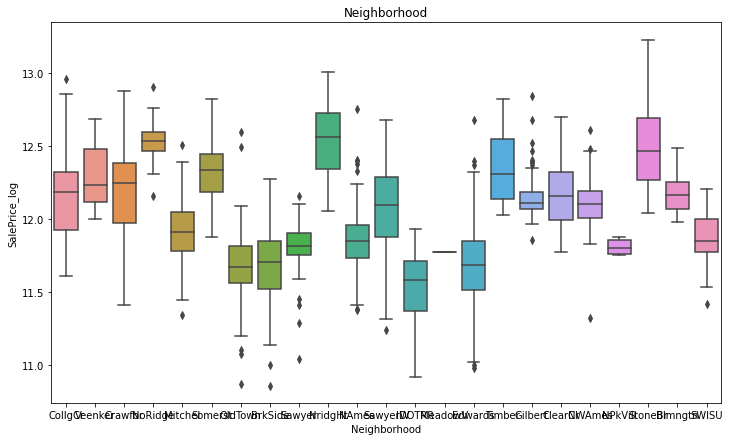

In [87]:
## Highest P Value

plt.figure(1, figsize=(12,7))
sns.boxplot(data=df, x='OverallQual', y='SalePrice_log')
plt.title('OverallQual')
plt.show(1)

plt.figure(2, figsize=(12,7))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice_log')
plt.title('Neighborhood')
plt.show(2)

### 7.2 Point Biserial Correlation

In [11]:
df[binomial].dtypes

Street               object
CentralAir           object
RenovatedY/N         object
2ndFloorY/N           int64
PorchY/N              int64
BsmtFinSF2_cat        int64
LowQualFinSF_cat      int64
EnclosedPorch_cat     int64
3SsnPorch_cat         int64
ScreenPorch_cat       int64
MiscVal_cat           int64
PoolArea_cat          int64
dtype: object

In [48]:
def ttest(df, target, features):
    y = df[target]
    ttest_df = pd.DataFrame()
    ttest_df['feature'] = features
    p_values = list()
    for f in features:
        samples = list()
        for cls in df[f].unique():
            s = df[df[f] == cls]['SalePrice_log'].values
            samples.append(s)
            print(cls, len(s))
        print('-'*30)
        p_val = stats.ttest_ind(*samples)[1]
        p_values.append(p_val)
        print('Pointbiserial corr coef = ', p_val)
        print('='*30)
    ttest_df['p_values'] = p_values
    ttest_df.sort_values('p_values', inplace=True, ascending=True)
    
    return ttest_df

In [62]:
ttest_df = ttest(df, 'SalePrice_log', binomial)
ttest_df['disparity'] = np.log(1./(ttest_df['p_values'].values))

ttest_df

Pave 1249
Grvl 3
------------------------------
Pointbiserial corr coef =  0.004198344120512916
Y 1168
N 84
------------------------------
Pointbiserial corr coef =  4.976955240307814e-37
no 642
yes 610
------------------------------
Pointbiserial corr coef =  2.0207497872881727e-05
1 506
0 746
------------------------------
Pointbiserial corr coef =  1.6090468495775603e-10
1 850
0 402
------------------------------
Pointbiserial corr coef =  1.1000664614853776e-29
0 1114
1 138
------------------------------
Pointbiserial corr coef =  0.19962203282351196
0 1229
1 23
------------------------------
Pointbiserial corr coef =  0.002888397443763978
0 1057
1 195
------------------------------
Pointbiserial corr coef =  4.54882081148383e-18
0 1230
1 22
------------------------------
Pointbiserial corr coef =  0.0045847057110871845
0 1157
1 95
------------------------------
Pointbiserial corr coef =  0.02567582827704722
0 1208
1 44
------------------------------
Pointbiserial corr coef =  0.00

,feature,p_values,disparity
1,CentralAir,4.976955e-37,83.590830
4,PorchY/N,1.100066e-29,66.679597
7,EnclosedPorch_cat,4.548821e-18,39.931664
3,2ndFloorY/N,1.609047e-10,22.550209
2,RenovatedY/N,2.020750e-05,10.809457
10,MiscVal_cat,9.441831e-04,6.965190
6,LowQualFinSF_cat,2.888397e-03,5.847053
0,Street,4.198344e-03,5.473065
8,3SsnPorch_cat,4.584706e-03,5.385029
9,ScreenPorch_cat,2.567583e-02,3.662205


In [63]:
np.log(1./0.05)

2.995732273553991

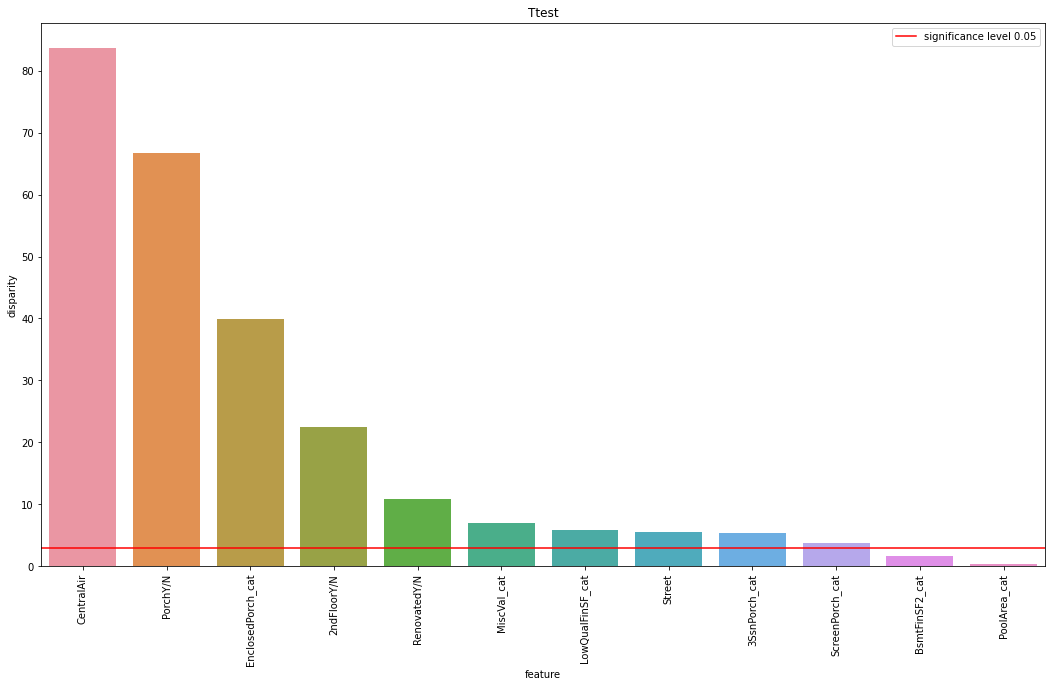

In [70]:
plt.figure(figsize=(18, 10))
sns.barplot(data=ttest_df, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.title('Ttest')
plt.axhline(y=np.log(1./0.05), color='r', label='significance level 0.05')
plt.legend()
plt.show()

In [88]:
binomial

['Street',
 'CentralAir',
 'RenovatedY/N',
 '2ndFloorY/N',
 'PorchY/N',
 'BsmtFinSF2_cat',
 'LowQualFinSF_cat',
 'EnclosedPorch_cat',
 '3SsnPorch_cat',
 'ScreenPorch_cat',
 'MiscVal_cat',
 'PoolArea_cat']

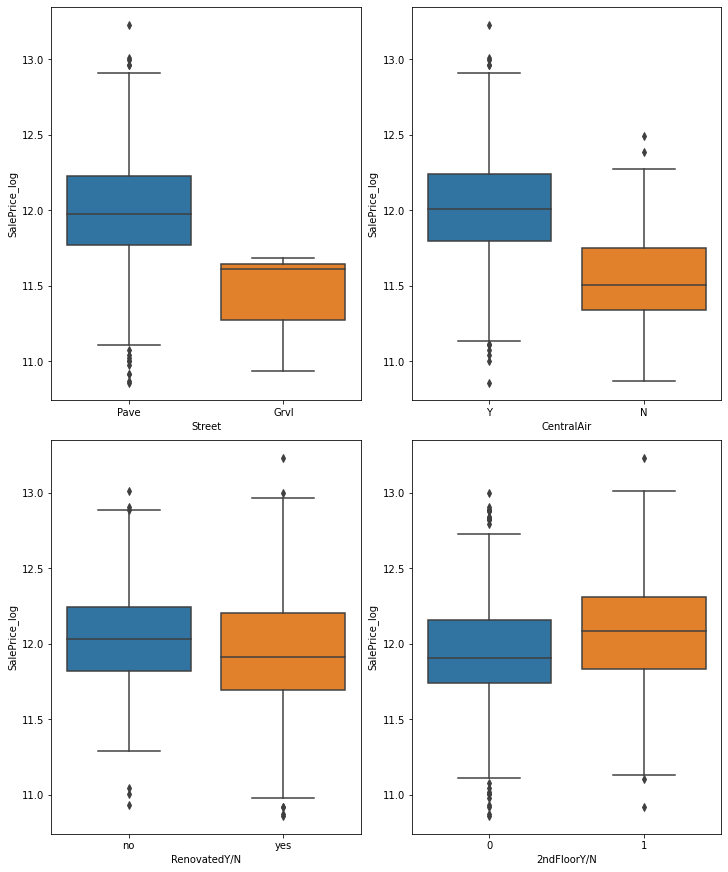

In [90]:
## Highest and lowest P Value

n = int(len(['CentralAir', 'PorchY/N', 'BsmtFinSF2_cat', 'PoolArea_cat'])/2)
fig, axs = plt.subplots(n, 2, figsize=(10,12), constrained_layout=True)
axs = axs.flatten()

for i, ax_ in enumerate(axs):
    try:
        sns.boxplot(x=(binomial)[i], y="SalePrice_log", data=df, ax = axs[i])
    except IndexError:
        continue

In [91]:
## Define Top Related From Matrix

def top_related(df_matrix, asc = False):
    corr_df_matrix = df_matrix.unstack().reset_index()
    corr_df_matrix.columns = ["feature_0", 'feature_1', 'correlation']
    corr_df_matrix['keep'] = corr_df_matrix.apply(
        lambda x: False if x['feature_0'] == x['feature_1'] else True, axis=1)
    corr_df_matrix['feature_comb'] = corr_df_matrix.apply(
        lambda x: ' and '.join(set(x[['feature_0', 'feature_1']])), axis=1)
    corr_featurs = corr_df_matrix[corr_df_matrix['keep'] == True][[
        'feature_comb', 'correlation']].drop_duplicates().sort_values(by='correlation', ascending=asc)
    
    return corr_featurs

### 7.3 Cramers V

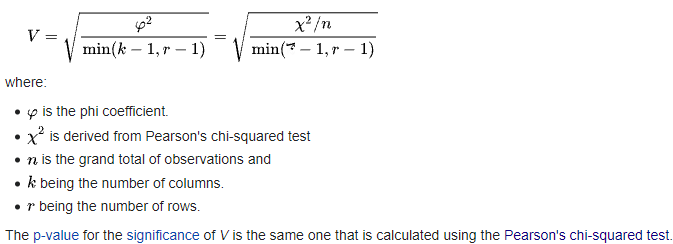
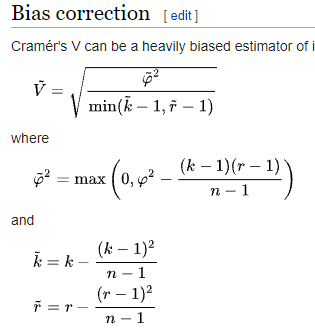

In [110]:
## Cramér's V can be a heavily biased estimator of its population counterpart 
## and will tend to overestimate the strength of association.

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     phi2corr = phi2
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
#     rcorr = r
#     kcorr = k
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

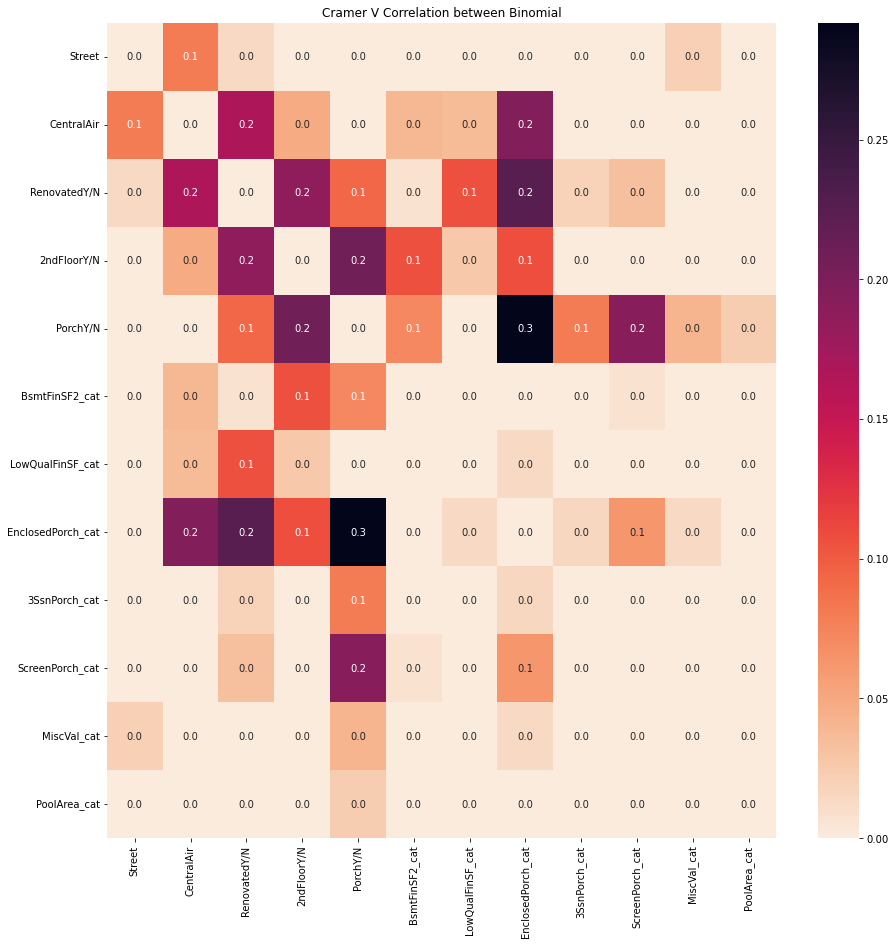

In [111]:
cols = binomial
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

kramer_binom = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(kramer_binom, annot=True, ax=ax, cmap = sns.cm.rocket_r, fmt='0.1f'); ax.set_title("Cramer V Correlation between Binomial");

In [113]:
top_related(kramer_binom).head(5)

,feature_comb,correlation
55,EnclosedPorch_cat and PorchY/N,0.291772
31,RenovatedY/N and EnclosedPorch_cat,0.225233
40,2ndFloorY/N and PorchY/N,0.207221
85,EnclosedPorch_cat and CentralAir,0.195405
19,CentralAir and EnclosedPorch_cat,0.195405


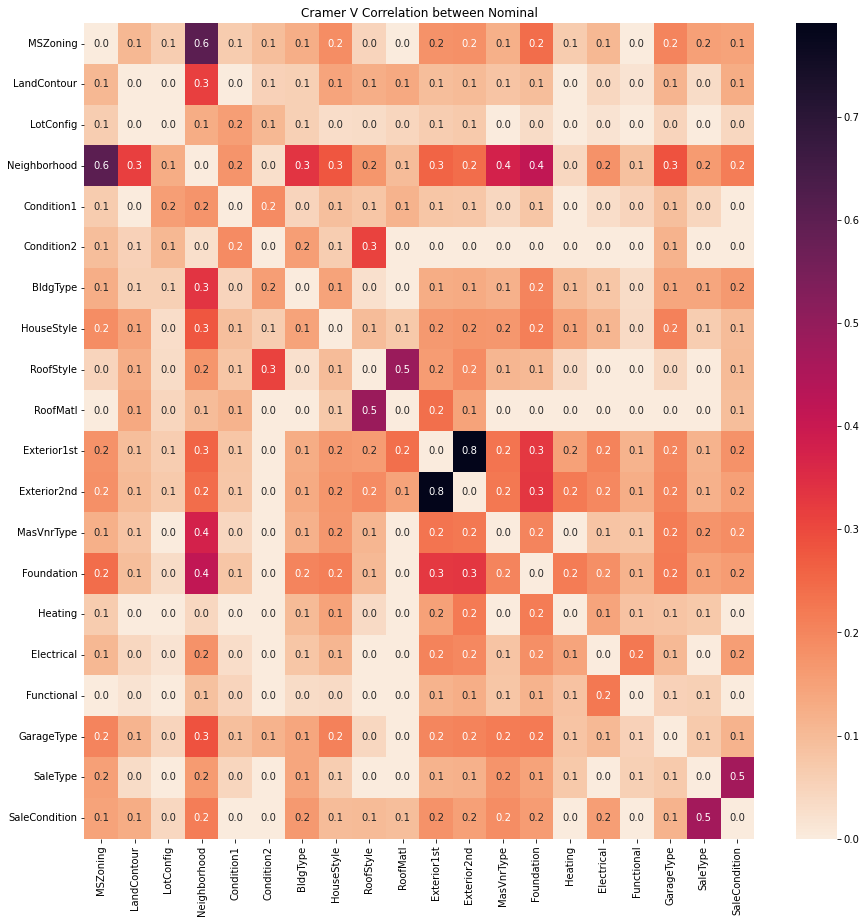

In [114]:
cols = nominal
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

kramer_nom = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(kramer_nom, annot=True, ax=ax, cmap = sns.cm.rocket_r, fmt='0.1f'); ax.set_title("Cramer V Correlation between Nominal");

In [115]:
top_related(kramer_nom).head(5)

,feature_comb,correlation
211,Exterior1st and Exterior2nd,0.791305
3,MSZoning and Neighborhood,0.604917
169,RoofMatl and RoofStyle,0.488000
379,SaleType and SaleCondition,0.470964
73,Foundation and Neighborhood,0.414895


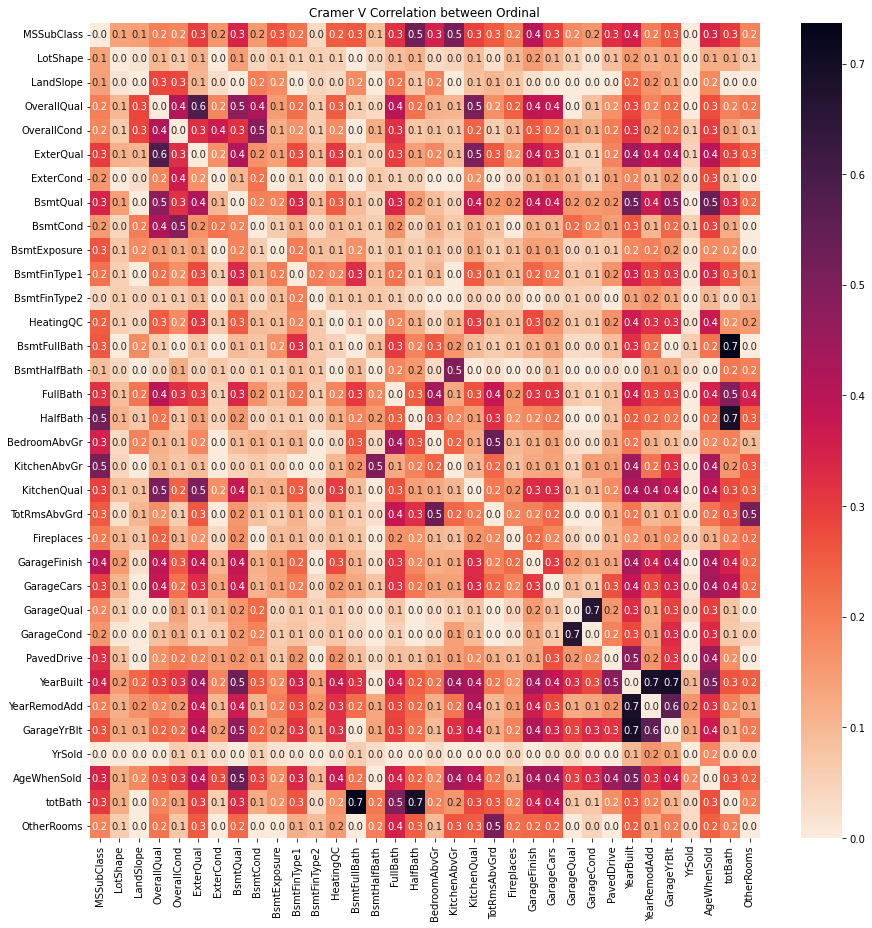

In [116]:
cols = ordinal
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

kramer_ord = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(kramer_ord, annot=True, ax=ax, cmap = sns.cm.rocket_r, fmt='0.1f'); ax.set_title("Cramer V Correlation between Ordinal");

In [117]:
top_related(kramer_ord).head(5)

,feature_comb,correlation
474,totBath and BsmtFullBath,0.736977
947,YearBuilt and GarageYrBlt,0.695346
576,HalfBath and totBath,0.690557
946,YearRemodAdd and YearBuilt,0.686564
841,GarageCond and GarageQual,0.661133


In [34]:
top_related(krammer_ord).head(10)

,feature_comb,correlation
457,BsmtFullBath and totBath,0.753807
988,GarageYrBlt and YearBuilt,0.702706
987,YearRemodAdd and YearBuilt,0.700013
940,totBath and HalfBath,0.677390
556,HalfBath and totBath,0.677390
817,GarageQual and GarageCond,0.661877
104,ExterQual and OverallQual,0.597159
1021,GarageYrBlt and YearRemodAdd,0.569895
258,BsmtQual and AgeWhenSold,0.537874
16,MSSubClass and HalfBath,0.536962


### 7.4 Chi-2 test

In [139]:
def chi1(x, y):
    conf_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(conf_matrix)[0]
    
    return chi2


# cols = train_df[ohencoded_list].columns.tolist()
cols = binomial + nominal
corrM = np.zeros((len(cols),len(cols)))


for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    
    corrM[idx1, idx2] = chi1(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

chi2_result = pd.DataFrame(corrM, index=cols, columns=cols)
# fig, ax = plt.subplots(figsize=(15, 15))
# ax = sns.heatmap(chi2_result, annot=False, ax=ax, cmap = sns.cm.rocket_r); ax.set_title("Chi2 Correlation between Nominal");

In [140]:
chi2_ = top_related(chi2_result)
# chi2_['correlation'].plot(figsize=(5, 10));


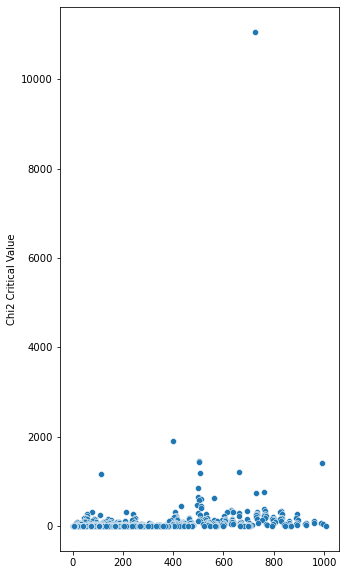

In [141]:
plt.figure(figsize=(5, 10))
sns.scatterplot(x=chi2_.index, y = chi2_['correlation'])
plt.ylabel('Chi2 Critical Value')
plt.show()

In [142]:
chi2_[chi2_['correlation'] >= 200].head(40)

,feature_comb,correlation
727,Exterior1st and Exterior2nd,11062.747068
399,MSZoning and Neighborhood,1914.763772
502,Exterior1st and Neighborhood,1449.599448
503,Neighborhood and Exterior2nd,1433.679520
991,SaleType and SaleCondition,1422.991898
661,RoofMatl and RoofStyle,1208.829341
505,Foundation and Neighborhood,1183.362464
115,HouseStyle and 2ndFloorY/N,1159.325249
499,HouseStyle and Neighborhood,842.341650
761,Foundation and Exterior2nd,763.974845


### 7.5 Correlation

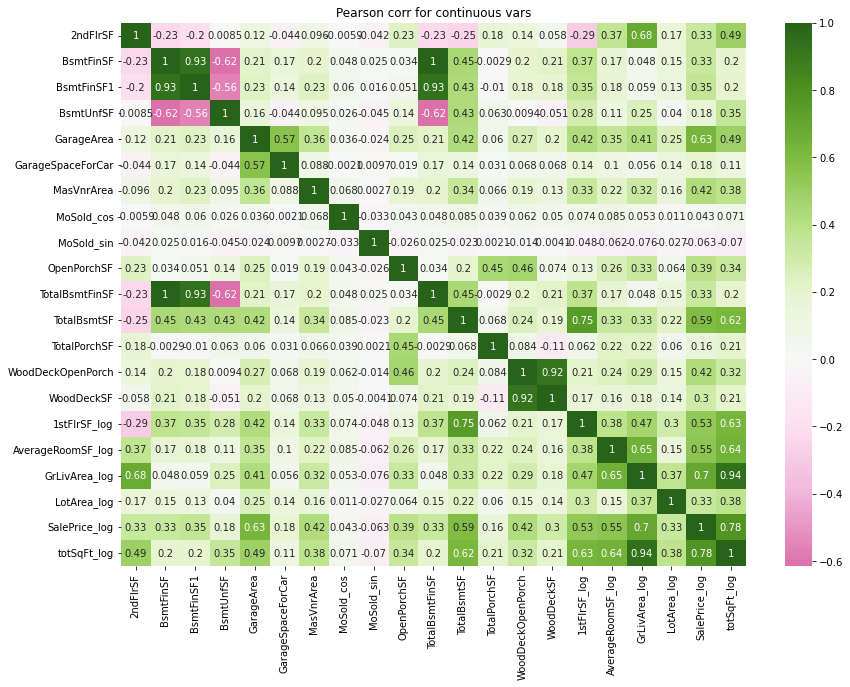

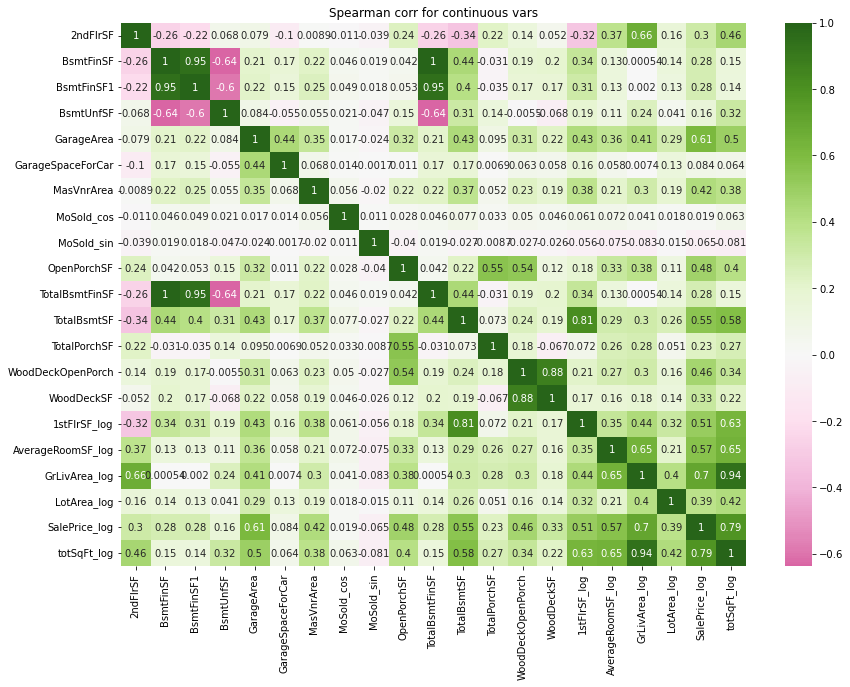

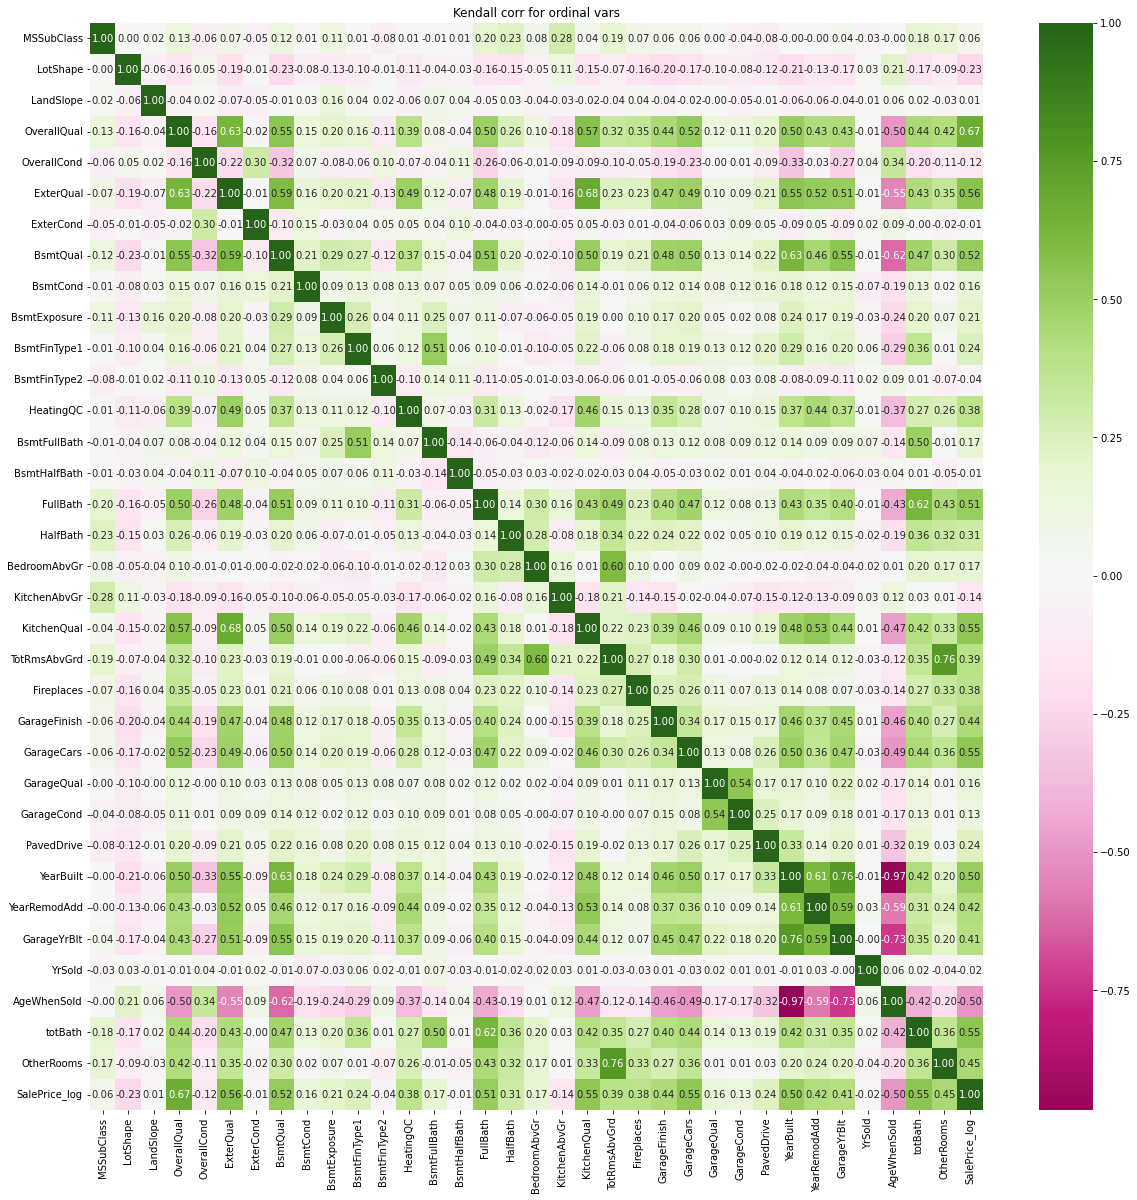

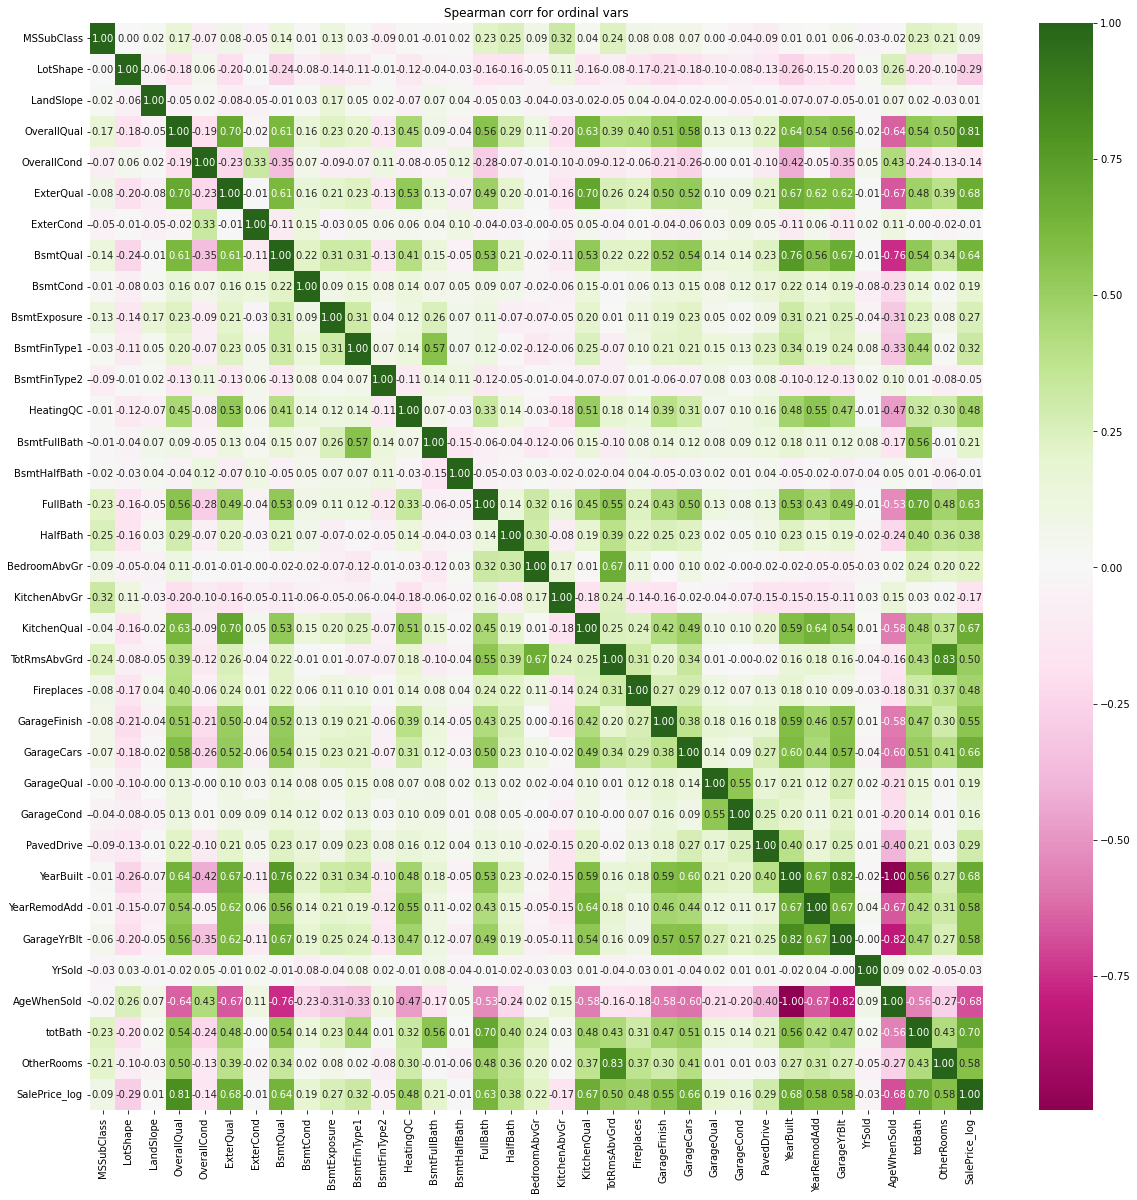

In [126]:
plt.figure(1, figsize=(14,10))
corr_cont1 = df[continuous].corr(method='pearson')
sns.heatmap(corr_cont1, center = 0, cmap="PiYG",annot=True)
plt.title('Pearson corr for continuous vars')
plt.show(1)

plt.figure(2, figsize=(14,10))
corr_cont2 = df[continuous].corr(method='spearman')
sns.heatmap(corr_cont2, center = 0, cmap="PiYG",annot=True)
plt.title('Spearman corr for continuous vars')
plt.show(2)

plt.figure(3, figsize=(20,20))
corr_ord1 = df[ordinal+['SalePrice_log']].corr(method='kendall')
sns.heatmap(corr_ord1, center = 0, cmap="PiYG", annot=True, fmt='0.2f')
plt.title('Kendall corr for ordinal vars')
plt.show(3)

plt.figure(4, figsize=(20,20))
corr_ord2 = df[ordinal+['SalePrice_log']].corr(method='spearman')
sns.heatmap(corr_ord2, center = 0, cmap="PiYG", annot=True, fmt='0.2f')
plt.title('Spearman corr for ordinal vars')
plt.show(4)
# plt.figure(3, figsize=(18,6))
# corr3 = pd.DataFrame(np.zeros([len(continious)+1, len(cat_ordered + cat_disordered)+1]), 
#                     index=continious+['SalePrice_log'], columns=cat_ordered + cat_disordered+['SalePrice_log'])
# for q1 in continious:
#     for q2 in cat_ordered + cat_disordered+['SalePrice_log']:
#         corr3.loc[q1, q2] = enc_df[q1].corr(enc_df[q2])
# sns.heatmap(corr3, center = 0, cmap="PiYG")


In [127]:
top_related(corr_cont1).head(10)

,feature_comb,correlation
31,BsmtFinSF and TotalBsmtFinSF,1.000000
377,totSqFt_log and GrLivArea_log,0.940419
212,BsmtFinSF1 and TotalBsmtFinSF,0.933313
52,TotalBsmtFinSF and BsmtFinSF1,0.933313
23,BsmtFinSF and BsmtFinSF1,0.933313
287,WoodDeckSF and WoodDeckOpenPorch,0.918821
419,totSqFt_log and SalePrice_log,0.780633
246,TotalBsmtSF and 1stFlrSF_log,0.749726
376,GrLivArea_log and SalePrice_log,0.695160
17,2ndFlrSF and GrLivArea_log,0.681119


In [128]:
top_related(corr_ord1).head(10)

,feature_comb,correlation
974,YearBuilt and GarageYrBlt,0.760143
733,OtherRooms and TotRmsAbvGrd,0.755097
194,ExterQual and KitchenQual,0.682793
1193,OverallQual and SalePrice_log,0.665142
139,SalePrice_log and OverallQual,0.665142
272,BsmtQual and YearBuilt,0.628328
110,ExterQual and OverallQual,0.626476
557,totBath and FullBath,0.623792
973,YearRemodAdd and YearBuilt,0.611094
615,BedroomAbvGr and TotRmsAbvGrd,0.597450


In [129]:
top_related(corr_ord2).head(10)

,feature_comb,correlation
733,OtherRooms and TotRmsAbvGrd,0.825183
974,YearBuilt and GarageYrBlt,0.820692
139,SalePrice_log and OverallQual,0.806185
1193,OverallQual and SalePrice_log,0.806185
272,BsmtQual and YearBuilt,0.759301
194,ExterQual and KitchenQual,0.704556
1154,totBath and SalePrice_log,0.700004
557,totBath and FullBath,0.699381
110,ExterQual and OverallQual,0.695111
979,YearBuilt and SalePrice_log,0.684837


In [143]:
df['BsmtFinSF']

Id
1        706
2        978
3        486
4        216
5        655
        ... 
1455     410
1456       0
1457     953
1458     275
1459    1078
Name: BsmtFinSF, Length: 1252, dtype: int64